# Traffic sign classification

## 1. Image preprocessing
### Before we start to do the actual classification task, we need to do some preprocessing work of the images, including cropping and resizing. Image preprocessing is very common and necessary in the filed of computer vision. And there are lots of methods for image preprocessing, we can choose them based on practical needs. In our case, we only focus on a small part of the image which called ROI (region of interests), the other parts of the image can be regarded as redudant information.

### 1.1 Image cropping
In order to crop the ROI, we need the coordinates information which stored in the csv file named degroup. Open the csv file you will see the details of ROI, and coordinates of upper left corner and lower right corner are exactly what we need for cropping. Let's try to crop one image first.Before that, we need to learn how to deal with a csv file.A detailed guideline for this operation can be found at https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

In [1]:
# Load some packages 
import pandas as pd
import numpy as np
# Load the csv file
csvfile = pd.read_csv('./degroup.csv')
# print the first 5 rows in this csv file
print (csvfile.head())


                                     img  width  height   x1   y1   x2   y2  \
0  5eed516cce03c83312fe4c678430faf2.jpeg    350     720   83  240  134  284   
1  6a466e64902392038bc2cb61b60d3541.jpeg    350     720   87  177  126  236   
2  0053296c4c7c5242542150016019348c.jpeg    350     720  157  264  246  362   
3  9778755b90f8121356ce4de55dc94f39.jpeg    350     720  181  425  214  461   
4  8d585a1854b343644e940b5912202dc2.jpeg    350     720  159  252  193  320   

   class  
0     11  
1     16  
2     30  
3     18  
4     16  


Then you may want to have a look at the image, so we display it using simple codes.

In [2]:
# Import the image preocessing package
from PIL import Image
# we randomly selected one image in this csvfile, e.g, the 20th one
i = 20
# Use the image package to load the raw image with index i
im = Image.open('./img/{}'.format(csvfile['img'][i]))
# Print the image size (check the width and height in csv file)
print ("The image size is", im.size)
# Show the image
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(im)



The image size is (540, 720)


Finally, we talk about the cropping. Let's crop the traffic sign with the coordinates.

The traffic sign size is: (487, 404)


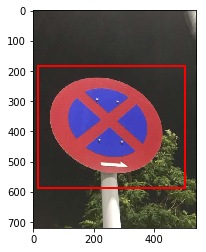

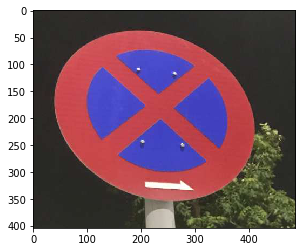

In [3]:
# Load the pathes package
from matplotlib import patches
# Get the coordinates of the ROI
x1 = csvfile['x1'][i]
x2 = csvfile['x2'][i]
y1 = csvfile['y1'][i]
y2 = csvfile['y2'][i]

# Python defines a rectangle by setting the upper left point as the start point, with predefined width and height.
x_upperleft = x1
y_upperleft = y2
width = x2-x1
height = y1-y2

# Display the ROI: use patches to draw a rectangle in a specific location with red border 
rect = patches.Rectangle((x_upperleft, y_upperleft), width, height, linewidth=2, edgecolor='red',facecolor='none')
# Show the image
plt.figure()
plt.imshow(im)
# Add the rectangle into the image
ax = plt.gca()
ax.add_patch(rect)

# Use the coordinate to crop the image, (upperleft_x, upperleft_y, lowerright_x, lowerright_y)

TrafficSign = im.crop((x1, y1, x2, y2))
# Print the cropped image size
print ("The traffic sign size is:", TrafficSign.size)
# Show the cropped image
plt.figure()
plt.imshow(TrafficSign)

### 1.2 Image resizing

We can extract corresponding ROIs of all the raw images.But then a new problem arises: the ROIs have various sizes! So we'd like to resize the ROIs to same size, for example, 100  ××  100:

In [4]:
# Resize the ROI
TrafficSign = TrafficSign.resize((100, 100), Image.ANTIALIAS)
# Print the resized ROI size
print ("The resized traffic sign size is:", TrafficSign.size)

The resized traffic sign size is: (100, 100)


### 1.3 Multiple images processing
Above mentioned are the guidelines for preprocessing a single image, since we have several hundred images, we need a more efficient way to deal with them.
Basically there are three steps for this operation:
+ Get names, ROI's coordinates, Labels of all the raw images
+ Extract all the ROIs and save them
+ Flatten the ROIs and then form the training set



In [5]:
#The first step
# Get all names, coordinates, Labels
# DF:dataframe
ImgName_DF = csvfile['img']

# Coordinates of dataframe
X1_DF = csvfile['x1']
X2_DF = csvfile['x2']
Y1_DF = csvfile['y1']
Y2_DF = csvfile['y2']
Label = csvfile['class']

We use for loop here to deal with multiple images and flatten the extracted ROI, i.e. a vector with size 1x(w*h*c),w ,h and c is the width height and number of channels of ROI respectively. Besides this, you may need to know some information about the data structure in Python. Check them at https://thomas-cokelaer.info/tutorials/python/data_structures.html and https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html

In [6]:
# The second and third step
# creat folders first,named roi and final_array
import os

destination_path = './roi/'
array_path = './final_array/'

# Get sample's number
SampleNum = len(ImgName_DF)

# # Generate a container for the final dataset
# finalData = np.zeros((SampleNum, ))
# Loop for the process of each image
j = 0

# Create an empty container to store the data
temp_list = []
for i in range(SampleNum):
    # Get corresponding name
    
    imname = ImgName_DF[i]
    # Get corresponding coordinates    
    x1 = X1_DF[i]
    x2 = X2_DF[i]
    y1 = Y1_DF[i]
    y2 = Y2_DF[i]
    
    if x1 < x2 and y1 < y2:
        # load image, RGB
        img = Image.open('./img/{}'.format(imname)).convert("RGB")
        # crop the ROI
        sign = img.crop((x1, y1, x2, y2))
        # resize the ROI
        sign = sign.resize((100, 100), Image.ANTIALIAS)
        # Get the ROI's label
        roi_label = Label[i]
   
        #Save the ROI image
        sign.save(destination_path+'roi_'+str(j)+'_'+str(roi_label)+'.jpeg')
    
        # Flatten the ROI 
        signArr = np.asarray(sign).flatten()
        # put the flatten data into the final dataset in our container: list
        temp_list.append(signArr)
        j = j+1
    else:
        print('error')
# Convert the format of list to ndarray
finalData = np.array(temp_list)
np.save(array_path+'finalData.npy',finalData)
print('ths size of final data is:', finalData.shape)

error
error
error
error
error
error
error
error
error
error
error
ths size of final data is: (359, 30000)


### 1.4 Conclusion
In this part we lear how to extrac the ROI and resize them, next section we're going to talk about how to get the features in the ROIs which will help you classify the signs. One thing to mention is that you can extract the features deal with cropped image or the ndarray-format data.